<a href="https://colab.research.google.com/github/rohitkg83/Deep_Learning/blob/main/Classifying_images_of_clothing_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar() # Disables Tqdm progress bar.

import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = metadata.features['label'].names
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
num_training_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_training_examples))
print('Number of test examples: {}'.format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [8]:
#def normalize(images, labels):
  #images = tf.cast(images, tf.float32)
  #images /= 255
  #return images, labels

#train_dataset = train_dataset.map(normalize)
#test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

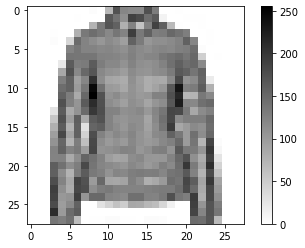

In [9]:
for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

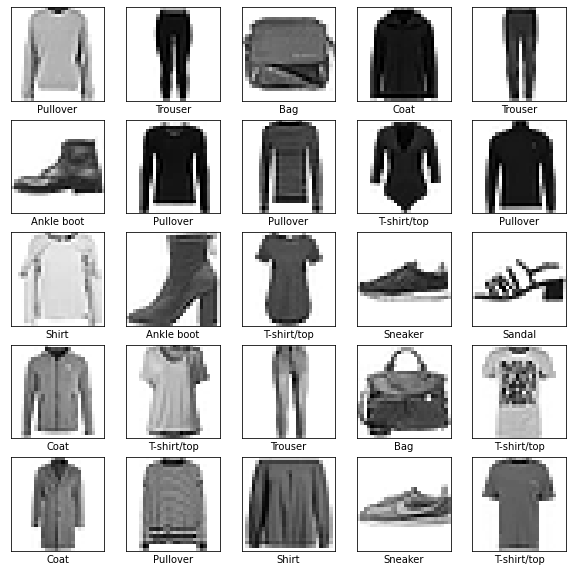

In [10]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [11]:
model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [12]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_training_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 3.3069 - accuracy: 0.6708
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7136 - accuracy: 0.7326
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5880 - accuracy: 0.7880
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5443 - accuracy: 0.8065
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5009 - accuracy: 0.8232


In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.5394 - accuracy: 0.8246
Accuracy on test dataset: 0.8245999813079834


In [16]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [17]:
predictions.shape

(32, 10)

In [18]:
predictions[0]

array([2.6754927e-04, 5.7695343e-07, 1.6683148e-02, 2.7051636e-03,
       7.5742179e-01, 1.3334620e-06, 2.2130696e-01, 2.2576272e-12,
       1.6134301e-03, 8.2100850e-14], dtype=float32)

In [19]:
np.argmax(predictions[0])

4

In [20]:
test_labels[0]

4

In [21]:
test_images.shape

(32, 28, 28, 1)

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
    
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


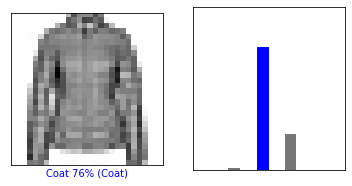

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

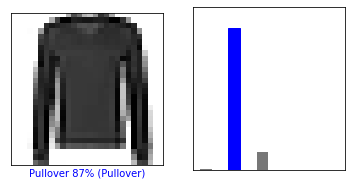

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

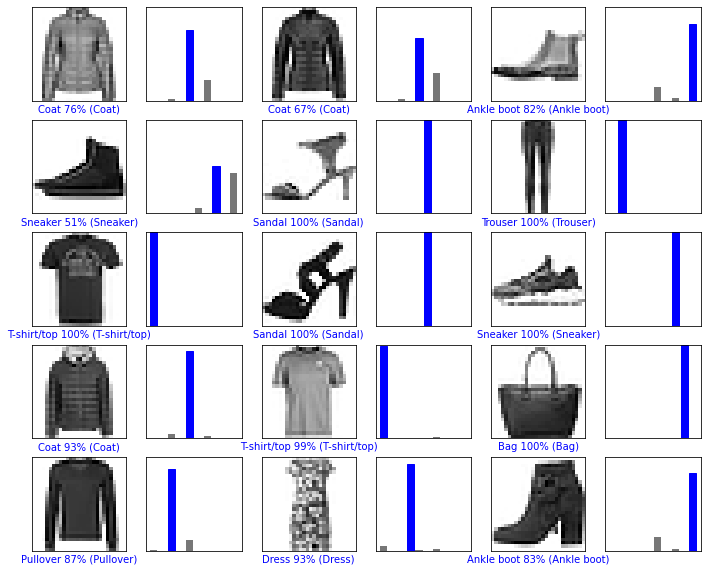

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [26]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [27]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.6754846e-04 5.7694945e-07 1.6683161e-02 2.7051552e-03 7.5742245e-01
  1.3334529e-06 2.2130631e-01 2.2576032e-12 1.6134254e-03 8.2100295e-14]]


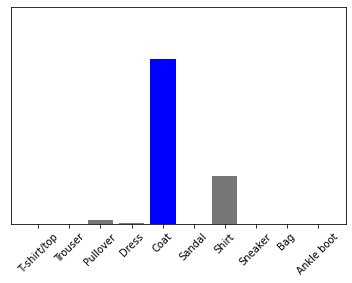

In [29]:
plot_value_array(0, predictions_single, test_labels)
_= plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

4

In [31]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [32]:
model1 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [35]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [36]:
model1.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4877 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3703 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3309 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3131 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2893 - accuracy: 0.8919


In [37]:
test_loss, test_accuracy = model1.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8719
Accuracy on test dataset: 0.8719000220298767


In [38]:
model2 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [39]:
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [41]:
model2.fit(train_dataset, epochs = 1, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4942 - accuracy: 0.8268


In [42]:
model3 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(10, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [43]:
model3.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [44]:
model3.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6484 - accuracy: 0.7812
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4620 - accuracy: 0.8403
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4307 - accuracy: 0.8499
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4166 - accuracy: 0.8550
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4080 - accuracy: 0.8585


In [45]:
model4 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(150, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [46]:
model4.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [47]:
model4.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4934 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3674 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3293 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3046 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2939 - accuracy: 0.8910


In [49]:
model5 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [50]:
model5.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [51]:
model5.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4656 - accuracy: 0.8333
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3566 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3210 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2790 - accuracy: 0.8967


In [52]:
model6 = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28,1)),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
     ])

In [53]:
model6.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [54]:
model6.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4861 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3610 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3009 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2824 - accuracy: 0.8960
